# <span style="color:green"> Numerical Simulation Laboratory (NSL) Exercise 3 Results </span>

## 03.1 

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:
1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. 

We show the results for the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$ with $M\ge 10^4$ and $10^2$ numbers of blocks.
The exercise has been done using both phyton and c++, the results are shown below.

In both cases all the observables tend to the exact solution obtained via Black-Scholes equations, in the phyton code case is required at least $M > 3\times10^3$ to find a convergence. The real value is within one $\sigma$ after $M \ge 10^4$ and for the $C[S(0),0]$ in the continuum instance and in the discretize case for $P[S(0),0]$ the code require more asset prices times. 

In the c++ code case we have a convergence after $M > 10^3$  with the real value within a $\sigma$. Only in the $P[S(0),0]$ discrete case we have a convergence within  $2\times \sigma$ from real value. After $M \ge 10^4$ the $P[S(0),0]$ discrete case prediction does not deviate much from the real value.



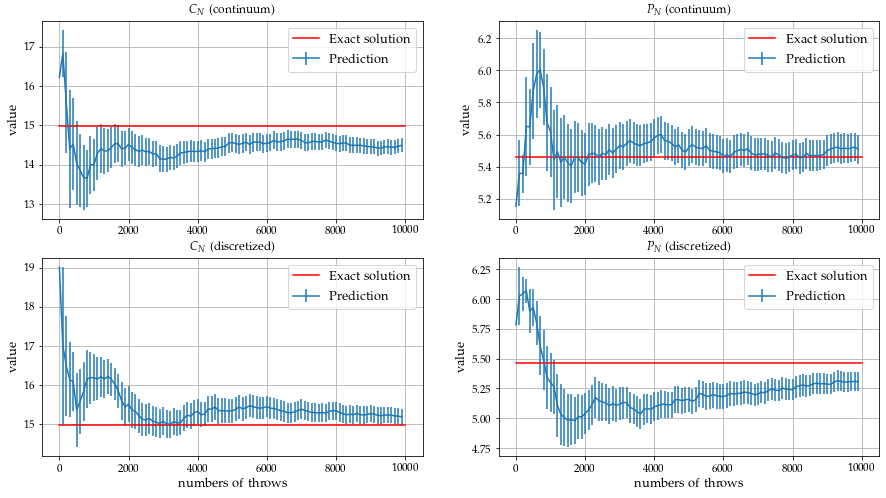

In [1]:
import numpy as np
import matplotlib.pyplot as plt
params = {'figure.figsize': (15,8),
          'axes.labelsize': 13,
          'legend.fontsize': 13,
          'xtick.labelsize': 11,
          'ytick.labelsize': 11,
          'text.usetex': True,
          'font.family': 'serif',
          'text.latex.preamble': r'\usepackage[sc]{mathpazo}'}
plt.rcParams.update(params)

np.random.seed(0)

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t = 0

num_time_intervals = 100

N = 10**4
nblocks = 100

def block_average(sample, nblocks):
    err_cum = np.zeros(nblocks)  
    mean = np.mean( np.split(sample, nblocks), axis=1 )                    # block-averaged sample
    mean_sq = mean**2                                                      # block-averaged sample, squared
    
    mean_cum = np.cumsum(mean) / np.arange(1, nblocks + 1)
    mean_cum_sq = np.cumsum(mean_sq) / np.arange(1, nblocks + 1)
    
    err_cum[1:] = np.sqrt((mean_cum_sq[1:] - mean_cum[1:]**2) / np.arange(1, nblocks)) # statistical uncertainty
    return mean_cum, err_cum


def call_put(S0, K, T, r, sigma, N, nblocks):
    W = np.random.normal(0, T, N) # sample of a Wiener process
    ST = S0 * np.exp((r-sigma**2/2)*T + sigma*W) # spot price at time T
    call = np.exp(-r*T) * np.max([np.zeros(N), ST - K], axis=0)
    put = np.exp(-r*T) * np.max([np.zeros(N), K - ST], axis=0)
    
    Cm, Cerr = block_average(call, nblocks)
    Pm, Perr = block_average(put, nblocks)
    return Cm, Cerr, Pm, Perr

def call_put_discretized(S0, K, T, num_time_intervals, r, sigma, N, nblocks):
    ST = np.empty(N)
    dt = T/num_time_intervals
    for i in range(N):
        W = np.random.normal(0, 1, num_time_intervals) # sample of a Wiener process
        STi = np.exp((r-sigma**2/2)*dt + sigma*W*np.sqrt(dt)) # *St(i)
        STi[0] *= S0
        ST[i] = np.cumprod(STi)[-1]
    call = np.exp(-r*T) * np.max([np.zeros(N), ST - K], axis=0)
    put = np.exp(-r*T) * np.max([np.zeros(N), K - ST], axis=0)
    
    Cm, Cerr = block_average(call, nblocks)
    Pm, Perr = block_average(put, nblocks)
    return Cm, Cerr, Pm, Perr


Cm, Cerr, Pm, Perr = call_put(S0, K, T, r, sigma, N, nblocks)
Cm_disc, Cerr_disc, Pm_disc, Perr_disc = call_put_discretized(S0, K, T, num_time_intervals, r, sigma, N, nblocks)

x = N/nblocks*np.arange(nblocks)
plt.figure(figsize=(15, 8))
plt.subplot(221)
plt.errorbar(x, Cm, yerr=Cerr, label= "Prediction")
plt.plot([1,N],[14.975790778311286, 14.975790778311286],'r',  label= "Exact solution")
plt.title('$C_N$ (continuum)')
#plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.errorbar(x, Pm, yerr=Perr, label= "Prediction")
plt.plot([1,N],[5.4595325819072364, 5.4595325819072364],'r',  label= "Exact solution")
plt.title('$P_N$ (continuum)')
#plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.errorbar(x, Cm_disc, yerr=Cerr_disc, label= "Prediction")
plt.plot([1,N],[14.975790778311286, 14.975790778311286],'r',  label= "Exact solution")
plt.title('$C_N$ (discretized)')
plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.errorbar(x, Pm_disc, yerr=Perr_disc, label= "Prediction")
plt.plot([1,N],[5.4595325819072364, 5.4595325819072364],'r',  label= "Exact solution")
plt.title('$P_N$ (discretized)')
plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)

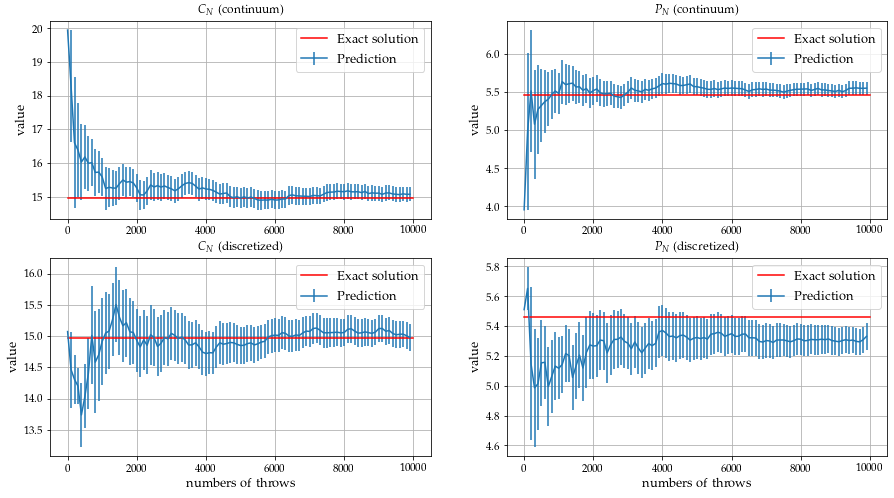

In [2]:
#### The C++(ish) Way ####
import subprocess
import os
import numpy as np
import matplotlib.pyplot as plt
M = 10**4
N = 100
path = os.path.join(os.getcwd(), "gbm/")

subprocess.run(["./gbm", str(M), str(N)], cwd=path)
Cm,Cerr,Pm,Perr = np.loadtxt("gbm/gbm.dat", unpack = True)

x = M/N*np.arange(N)
plt.figure(figsize=(15, 8))
plt.subplot(221)
plt.errorbar(x, Cm, yerr=Cerr, label= "Prediction")
plt.plot([0,M],[14.975790778311286, 14.975790778311286],'r',  label= "Exact solution")
plt.title('$C_N$ (continuum)')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.errorbar(x, Pm, yerr=Perr, label= "Prediction")
plt.plot([0,M],[5.4595325819072364, 5.4595325819072364],'r',  label= "Exact solution")
plt.title('$P_N$ (continuum)')
plt.ylabel('value')
plt.legend()
plt.grid(True)

subprocess.run(["./gbm_d", str(M), str(N)], cwd=path)
Cm_disc,Cerr_disc,Pm_disc,Perr_disc = np.loadtxt("gbm/gbm_d.dat", unpack = True)

plt.subplot(223)
plt.errorbar(x, Cm_disc, yerr=Cerr_disc, label= "Prediction")
plt.plot([0,M],[14.975790778311286, 14.975790778311286],'r',  label= "Exact solution")
plt.title('$C_N$ (discretized)')
plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.errorbar(x, Pm_disc, yerr=Perr_disc, label= "Prediction")
plt.plot([0,M],[5.4595325819072364, 5.4595325819072364],'r',  label= "Exact solution")
plt.title('$P_N$ (discretized)')
plt.xlabel('numbers of throws')
plt.ylabel('value')
plt.legend()
plt.grid(True)
